I did this a bit flippantly before, but I want to fomalize the process by which we estimate the uncertainty on emulator predictions. 

In [1]:
from pearce.emulator import NashvilleHot
from GPy.kern import *
import numpy as np
from os import path

In [2]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
training_file = '/home/users/swmclau2/scratch/xi_gg_zheng07_cosmo_v3/PearceXiggCosmo.hdf5'
test_file = '/home/users/swmclau2/scratch/xi_gg_zheng07_cosmo_test_v3/PearceXiggCosmoTest.hdf5'

In [4]:
em_method = 'gp'

In [5]:
fixed_params = {'z':0.0}

In [7]:
emu = NashvilleHot(training_file, hyperparams={},fixed_params = fixed_params, downsample_factor = 0.1)

In [8]:
pred_y, data_y = emu.goodness_of_fit(test_file, statistic = None)

In [9]:
data_y.shape

(18, 35000)

Contract over the realizations. 

In [33]:
pred_y_rs= pred_y.reshape((18,5,7, 1000), order = 'F')[:,0,:,:]
data_y_rs= data_y.reshape((18,5,7, 1000), order = 'F').mean(axis = 1)

In [47]:
data_y_rs2 = data_y.reshape((18, 5, 7, 1000), order ='F')

In [54]:
R = np.zeros((18,1000))
for i in xrange(7):
    R += (data_y_rs2[:,:,i,:] - data_y_rs[:,i,:].reshape((-1, 1, 1000))).mean(axis =1)

In [55]:
cov = R.dot(R.T)/(R.shape[1]-1)

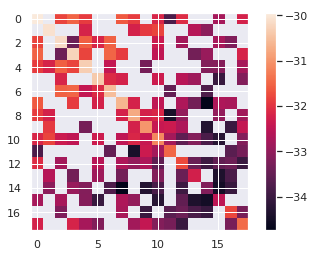

In [56]:
im = plt.imshow(np.log10(cov))
plt.colorbar(im)

In [39]:
R = (10**pred_y_rs - 10**data_y_rs).reshape((18,-1), order = 'F')

In [41]:
cov2 = R.dot(R.T)/(R.shape[1]-1)

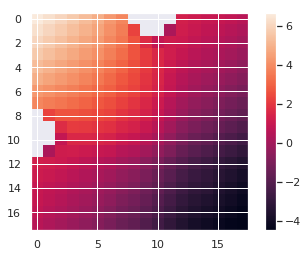

In [42]:
im = plt.imshow(np.log10(cov2))
plt.colorbar(im)